In [56]:
fdir = "../hanglog/single_pendulum2"

import os
logfiles = os.listdir(fdir)
print(logfiles)
fLog = os.path.join(fdir, logfiles[0])

['hdata-2021-01-01_18-44-59.log']


In [57]:
import sys
sys.path.append("..")
import hacktrack.loaders
fd = hacktrack.loaders.FlyDat(fLog)

Extracting knowndate from filename: 2021-01-01
E:1, Y:21292, Z:21125, aF:1146, aA:1166, aZ:1166
linAdifftime 7393.203309692672 count 1269
Made for Q 0 last index 0
Made for V 0 last index 0
Loading aQV as no pQV records
Made for aQ 0 last index 0
Made for aV 0 last index 0
Missing GPS data, so setting t0 to 2021-01-01 18:44:11.232203


In [58]:
fd.LoadC("ZYE")

Made for Z 21125 last index 21125
Warning, using guessed (not GPS) timing corrected value on Z 21125
pCattrname pZ
Made for Y 21292 last index 21292
Warning, using guessed (not GPS) timing corrected value on Y 21292
pCattrname pY
BAD VALUES 1 [(0, 'End(42419,3479)\n')]
Made for E 1 last index 0
Warning, using guessed (not GPS) timing corrected value on E 1


2

In [59]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook

import scipy.signal as sig
pitch=fd.pE[fd.pE.m==1]
roll=fd.pE[fd.pE.m==2]
#filt = sig.savgol_filter(a.d, 19,2)
#plt.plot(filt)
pitch

,m,d


In [60]:
import numpy as np

def set_zero(p):
    p.loc[:,'pitch'] = p['pitch']-p['pitch'].iloc[0]
    p.loc[:,'roll'] = p['roll']-p['roll'].iloc[0]
    p.loc[:,'heading'] = p['heading']-p['heading'].iloc[0]
    return p

def calc_a(p,g):
    set_zero(p)
    p.loc[:,'ax_calc']= -g * np.sin(np.radians(p['roll']))
    p.loc[:,'ay_calc']= -g * np.sin(np.radians(p['pitch']))
    return p

In [61]:
pZ = fd.pZ[~fd.pZ.bad]
pY = fd.pY[~fd.pY.bad]

pZ

,ax,ay,az,gx,gy,gz,q0,q1,q2,q3,s,iqsq,pitch,roll,heading,bad
2021-01-01 18:44:59.909203,0.01,-0.15,0.07,0.22,0.02,-9.8,121.0,-11148.0,-12005.0,-142.0,255.0,3.725328e-09,0.151889,1.295990,355.758652,False
2021-01-01 18:44:59.913203,0.00,-0.16,-0.02,0.22,0.02,-9.8,121.0,-11148.0,-12005.0,-142.0,255.0,3.725328e-09,0.151889,1.295990,355.758652,False
2021-01-01 18:44:59.937203,0.01,-0.15,0.02,0.22,0.02,-9.8,121.0,-11148.0,-12005.0,-142.0,255.0,3.725328e-09,0.151889,1.295990,355.758652,False
2021-01-01 18:44:59.947203,0.00,-0.15,0.02,0.22,0.02,-9.8,121.0,-11148.0,-12005.0,-142.0,255.0,3.725328e-09,0.151889,1.295990,355.758652,False
2021-01-01 18:44:59.954203,0.01,-0.15,0.05,0.22,0.02,-9.8,121.0,-11148.0,-12005.0,-142.0,255.0,3.725328e-09,0.151889,1.295990,355.758652,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 18:48:49.158203,0.01,-0.11,-0.19,0.18,0.00,-9.8,93.0,-13157.0,-9762.0,-126.0,247.0,3.725396e-09,0.002737,1.095339,376.851919,False
2021-01-01 18:48:49.170203,0.00,-0.14,-0.10,0.18,0.00,-9.8,89.0,-13157.0,-9762.0,-128.0,247.0,3.725399e-09,0.033538,1.089903,376.851626,False
2021-01-01 18:48:49.177203,0.00,-0.14,-0.10,0.18,0.01,-9.8,86.0,-13157.0,-9762.0,-131.0,247.0,3.725396e-09,0.062891,1.094251,376.851344,False
2021-01-01 18:48:49.185203,0.02,-0.15,-0.10,0.18,0.01,-9.8,83.0,-13157.0,-9762.0,-133.0,247.0,3.725396e-09,0.088076,1.092982,376.851105,False


In [62]:
ptest = calc_a(pZ, 9.81)


/home/timbo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/timbo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [63]:
ax_err = ptest['ax'] - ptest['ax_calc']
ay_err = ptest['ay'] - ptest['ay_calc']

<IPython.core.display.Javascript object>


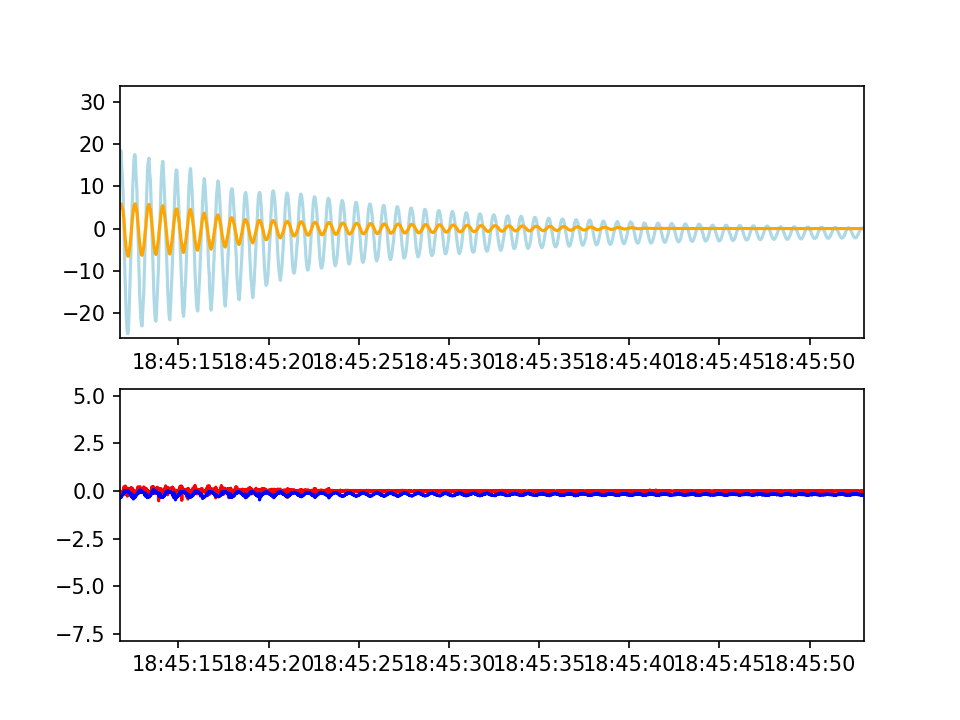

In [65]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook

base = plt.subplot(211)
plt.plot(ptest.pitch, color = 'lightblue')
plt.plot(ptest.roll, color = 'orange')
#plt.plot(ptest.ax, color = 'darkred')
#plt.plot(ptest.ax_calc, color = 'red')
#plt.plot(ptest.ay, color = 'darkblue')
#plt.plot(ptest.ay_calc, color = 'blue')

err = plt.subplot(212, sharex = base)
plt.plot(ax_err,color ='red')
plt.plot(ay_err,color ='blue')

#err = plt.subplot(313, sharex = base)
#plt.plot(pitch,color ='red')
#plt.plot(roll,color ='blue')


In [ ]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook


plt.plot(pZ.pitch)
plt.plot(pZ.roll)
plt.plot(pZ.ax, color = 'black')


In [ ]:
import numpy as np
import scipy as sp
g=9.81
L = g * (7/(9*2*np.pi))**2
L

In [ ]:
plt.plot(pZ.roll)
plt.plot(-pY.roll)

In [ ]:
plt.plot(pZ.heading)
plt.plot(pY.heading+180)

In [ ]:
import hacktrack.clickables
hacktrack.clickables.plotinteractivegpstrack(fd)